<a href="https://colab.research.google.com/github/Alina-Telnova/Machine-learning_Telnova/blob/main/%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание

1. Загрузите датасет для бинарной (анализ тональности (негатив и позитив)) или многоклассовой классификации:

Пример: обзоры фильмов с разметкой тональности в формате *.csv

2 Выполните препроцессинг:
-Чистка данных методами NLP (регулярки, удаление стоп-слов и т.д.) и Data Science (удаление пустых строк с помощью pd.dropna())
-Токенизация + векторизация (преобразование текстов к виду числовых представлений), например, с помощью токенизатора TensorFlow/Keras или PyTorch
-Паддинг/усечение (транкейшн) текстовых последовательностей
-Разделение датасета на обучающую, проверочную и тестовую выборки

3. Постройте модель CNN:

-Добавьте входной слой
-Добавьте слои свертки и пулинга
-Настройте размер ядра свертки
-Добавьте полносвязные слой
-Настройте функции активации для промежуточных и выходных слоев

4.Скомпилируйте модель:

- Настройте функцию потерь, оптимизатор укажите метрики оценки для валидации модели в процессе обучения

5. Обучите модель:

-Введите данные в модель
-Добавьте отслеживание потерь/точности обучения
6. Оцените модель:

-Проверьте модель на тестовом наборе
-Вычислите метрики оценки (например, полноту, точность, F1-меру)
-Выполните визуализацию результатов (например, с помощью матрицы ошибок)

7. Произведите настройку параметров

-Добавьте комментарии: какие настройки вы изменили и почему? Обоснуйте выбор параметров.

8. Сохраните модель

https://www.tensorflow.org/tutorials/keras/save_and_load
Базовый уровень:

9. Загрузите результат на гитхаб

1.Загрузка датасета для бинарной (анализ тональности (негатив и позитив))

In [1]:
from google.colab import files #загружаем датасет film reviews (не очень оригинально получилось)

dataset = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
#читаем наш датасет
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


2. Препроцессинг

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df.dropna(inplace=True)

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

df['cleaned_text'] = df['review'].apply(clean_text)

stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# проверяем все ли получилось
df.head()

,review,sentiment,cleaned_text
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [6]:
from sklearn.preprocessing import LabelEncoder

# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем метки в числовой формат
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment,cleaned_text
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200


tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Паддинг
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Разделение датасета
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [8]:
# Проверяем все ли получилось с токенизацией
print("Словарь (первые 10 слов):", list(tokenizer.word_index.items())[:10])

print("Пример токенизированного текста:", sequences[:3])

Словарь (первые 10 слов): [('<OOV>', 1), ('br', 2), ('movie', 3), ('film', 4), ('one', 5), ('like', 6), ('good', 7), ('time', 8), ('even', 9), ('would', 10)]
Пример токенизированного текста: [[5, 1923, 929, 57, 191, 2959, 281, 3073, 101, 495, 474, 2, 2, 21, 56, 3119, 2959, 5261, 1, 51, 442, 157, 101, 528, 53, 1606, 40, 7788, 2194, 1, 40, 2460, 5798, 5379, 1334, 260, 442, 3692, 244, 246, 528, 2, 2, 317, 2959, 1, 247, 1, 6715, 2406, 911, 1, 2575, 1279, 1, 403, 4542, 2322, 1061, 6898, 2773, 1, 273, 1, 1, 187, 4761, 2784, 403, 230, 33, 1, 8053, 1, 1, 4918, 7665, 2313, 1, 213, 8984, 7156, 1, 8576, 1, 37, 119, 135, 2, 2, 10, 50, 171, 1196, 40, 561, 93, 158, 166, 2877, 695, 83, 1168, 4039, 2361, 1094, 695, 1299, 695, 742, 2959, 816, 85, 21, 281, 44, 107, 3119, 1482, 2102, 50, 1447, 181, 1282, 1134, 2959, 91, 1, 187, 1902, 2003, 442, 442, 7548, 7045, 4887, 2848, 1, 6761, 379, 508, 17, 135, 14, 7488, 520, 574, 6761, 529, 1061, 1, 561, 447, 768, 1884, 1061, 432, 57, 2959, 97, 310, 3711, 3189, 67

In [9]:
 # все ок ли с паддингом
print("Длины первых 5 последовательностей:", [len(seq) for seq in sequences[:5]])

print("Размерности padded_sequences:", padded_sequences.shape)

Длины первых 5 последовательностей: [169, 92, 89, 72, 133]
Размерности padded_sequences: (50000, 200)


In [10]:
# все ок ли с разделением датасета
print(f"Размеры: x_train={x_train.shape}, x_val={x_val.shape}, x_test={x_test.shape}")

Размеры: x_train=(36000, 200), x_val=(4000, 200), x_test=(10000, 200)


In [11]:
#проверяем их тип
print("x_train type:", x_train.dtype)
print("y_train type:", y_train.dtype)
print("x_val type:", x_val.dtype)
print("y_val type:", y_val.dtype)

x_train type: int32
y_train type: int64
x_val type: int32
y_val type: int64


3.модель CNN

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Embedding(input_dim=20000, output_dim=16),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6910 - loss: 0.5275 - val_accuracy: 0.8746 - val_loss: 0.2930
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9196 - loss: 0.2100 - val_accuracy: 0.8791 - val_loss: 0.2881
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9630 - loss: 0.1122 - val_accuracy: 0.8660 - val_loss: 0.3568
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9852 - loss: 0.0520 - val_accuracy: 0.8705 - val_loss: 0.4336
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9941 - loss: 0.0219 - val_accuracy: 0.8676 - val_loss: 0.5490
313/313 - 1s - 2ms/step - accuracy: 0.8676 - loss: 0.5490
Test accuracy: 0.8676


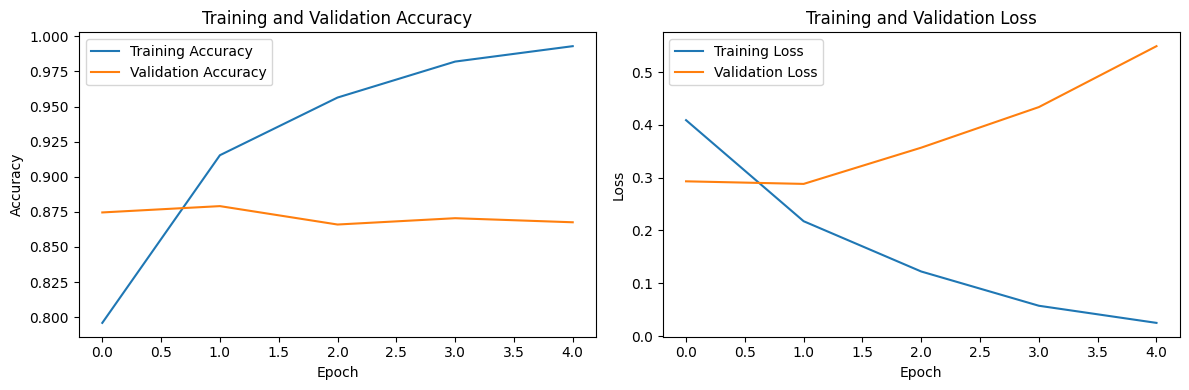

In [13]:
import matplotlib.pyplot as plt
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # для двоичной классификации
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


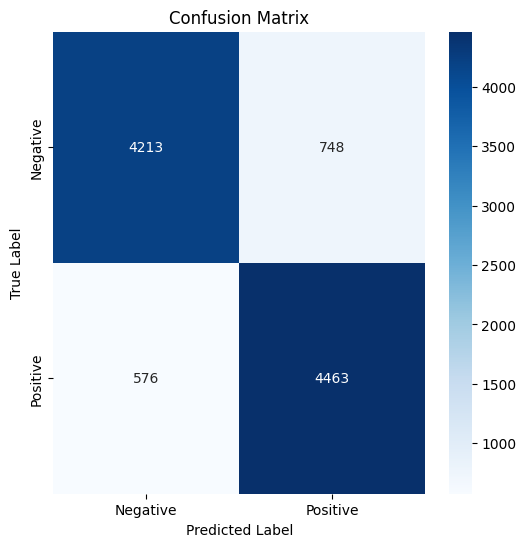

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Предсказания на тестовых данных
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Преобразуем вероятности в метки (0 или 1)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Отображение матрицы ошибок
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Модель, к сожалению, переобучилась.  
Причины:
Высокая разница между точностью на обучающей и валидационной выборках.
Снижение потерь на обучающей выборке и их рост на валидационной выборке.
Низкая тестовая точность, которая соответствует точности на валидационной выборке, а не на обучающей.

Что будем делать с переобучением?
Можно попробовать следующее:
- Поиграться с гиперпараметрами
- Применить early stopping

In [15]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Создание модели
model = models.Sequential([
    layers.Embedding(input_dim=20000, output_dim=128, input_length=200),
    layers.Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.0005)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Conv1D(256, 3, activation='relu', kernel_regularizer=l2(0.0005)),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Увеличен Dropout для борьбы с переобучением
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Добавлен дополнительный Dropout
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели с уменьшенным learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),  # Уменьшен learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping с мониторингом валидационной точности
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели с уменьшенным batch size
history = model.fit(x_train, y_train, epochs=7, batch_size=16,  # Уменьшен batch size
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.5151 - loss: 0.9239 - val_accuracy: 0.8482 - val_loss: 0.5207
Epoch 2/7
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8441 - loss: 0.5018 - val_accuracy: 0.8768 - val_loss: 0.4238
Epoch 3/7
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9177 - loss: 0.3390 - val_accuracy: 0.8778 - val_loss: 0.3955
Epoch 4/7
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9562 - loss: 0.2299 - val_accuracy: 0.8802 - val_loss: 0.4007
Epoch 5/7
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9728 - loss: 0.1751 - val_accuracy: 0.8784 - val_loss: 0.4229
Epoch 6/7
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9843 - loss: 0.1442 - val_accuracy: 0.8715 - val_loss: 0.4324
Epoch 7/7
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9856 - loss: 0.1373 - val_accuracy: 0.8793 - val_loss: 0.4439
313/313 - 2s - 5ms/step - accuracy: 0.8778 - loss: 0.3955
Test accuracy: 0.8778


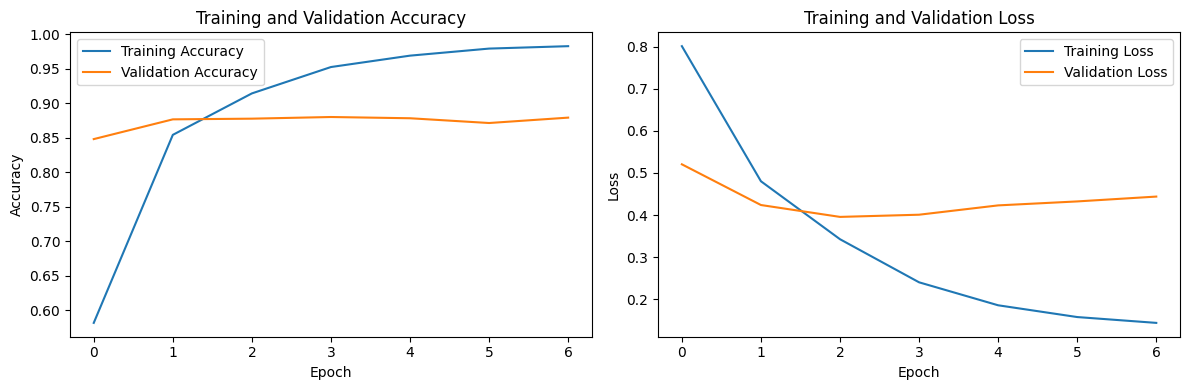

In [16]:
# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Получилось лучше, но все равно не то, т.к. validation loss начинает расти(
  

In [21]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Построение улучшенной модели
improved_model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128),
    layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])

improved_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # отслеживаем потери на валидационной выборке
    patience=3,          # количество эпох без улучшения перед остановкой
    restore_best_weights=True  # восстановить веса лучшей модели
)

history = improved_model.fit(
    x_train, y_train,
    epochs=20,  # теперь максимально 20 эпох, но надеюсь, что остановится быстрее
    batch_size=128,  # увеличен размер батча
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

test_loss, improved_test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {improved_test_acc:.4f}")


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5182 - loss: 1.4546 - val_accuracy: 0.7110 - val_loss: 1.2124
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6837 - loss: 1.1369 - val_accuracy: 0.7667 - val_loss: 0.8981
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7613 - loss: 0.8403 - val_accuracy: 0.8102 - val_loss: 0.6628
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8127 - loss: 0.6331 - val_accuracy: 0.8435 - val_loss: 0.5224
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8509 - loss: 0.4999 - val_accuracy: 0.8625 - val_loss: 0.4383
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8782 - loss: 0.4067 - val_accuracy: 0.8695 - val_loss: 0.3927
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8995 - loss: 0.3443 - val_accuracy: 0.8745 - val_loss: 0.3670
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9113 - loss: 0.3003 - val_accuracy: 0

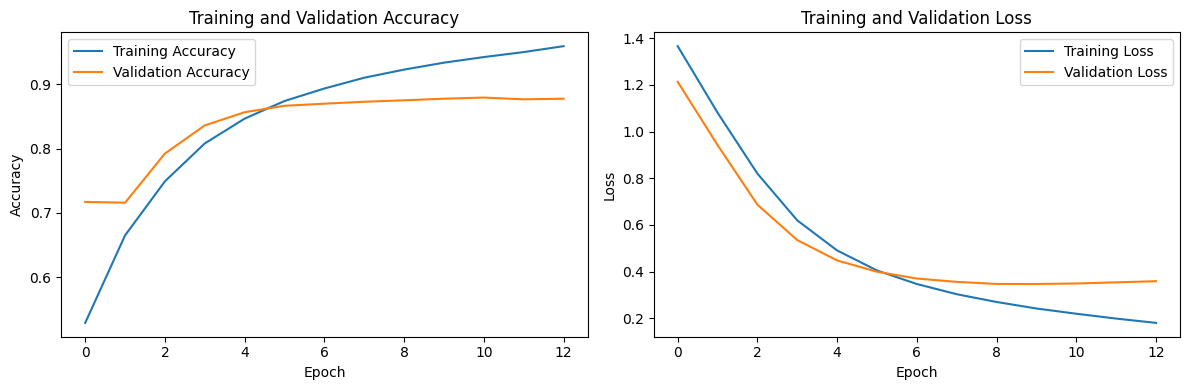

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Стало лучше,  поэтому сохраняем эту версию модельки)

In [23]:
model.save('improved_model.keras')

# Загрузка первой модели
loaded_model = tf.keras.models.load_model('improved_model.keras')

# Проверка загруженной модели
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy (Loaded First Model): {loaded_test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.8778 - loss: 0.3955
Test accuracy (Loaded First Model): 0.8778
